In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [3]:
df = pd.read_csv('CO2 emissions - North America.csv')
df.head()

,North-America Annual CO2 emissions,million metric tonnes carbon dioxide
0,1949,2206.690829
1,1950,2382.046176
2,1951,2526.687327
3,1952,2473.373964
4,1953,2536.892888


In [4]:
df.tail()

,North-America Annual CO2 emissions,million metric tonnes carbon dioxide
65,2014,6468.127089
66,2015,6336.860299
67,2016,6241.322193
68,2017,6215.118995
69,2018,6381.236073


In [5]:
df.shape

(70, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   North-America Annual CO2 emissions     70 non-null     int64  
 1    million metric tonnes carbon dioxide  70 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [7]:
df.isnull().sum()

North-America Annual CO2 emissions       0
 million metric tonnes carbon dioxide    0
dtype: int64

In [8]:
time = pd.date_range(start='1/1/1949',periods=70,freq='Y')
df['time_stamp'] = pd.DataFrame(time)
df.drop(['North-America Annual CO2 emissions'],axis=1,inplace=True)
df = df.set_index('time_stamp')

In [9]:
len(time)

70

In [10]:
df.head()

,million metric tonnes carbon dioxide
time_stamp,
1949-12-31,2206.690829
1950-12-31,2382.046176
1951-12-31,2526.687327
1952-12-31,2473.373964
1953-12-31,2536.892888


In [11]:
df.tail()

,million metric tonnes carbon dioxide
time_stamp,
2014-12-31,6468.127089
2015-12-31,6336.860299
2016-12-31,6241.322193
2017-12-31,6215.118995
2018-12-31,6381.236073


In [12]:
df.columns=['million_tonnes']

In [13]:
df

,million_tonnes
time_stamp,
1949-12-31,2206.690829
1950-12-31,2382.046176
1951-12-31,2526.687327
1952-12-31,2473.373964
1953-12-31,2536.892888
...,...
2014-12-31,6468.127089
2015-12-31,6336.860299
2016-12-31,6241.322193


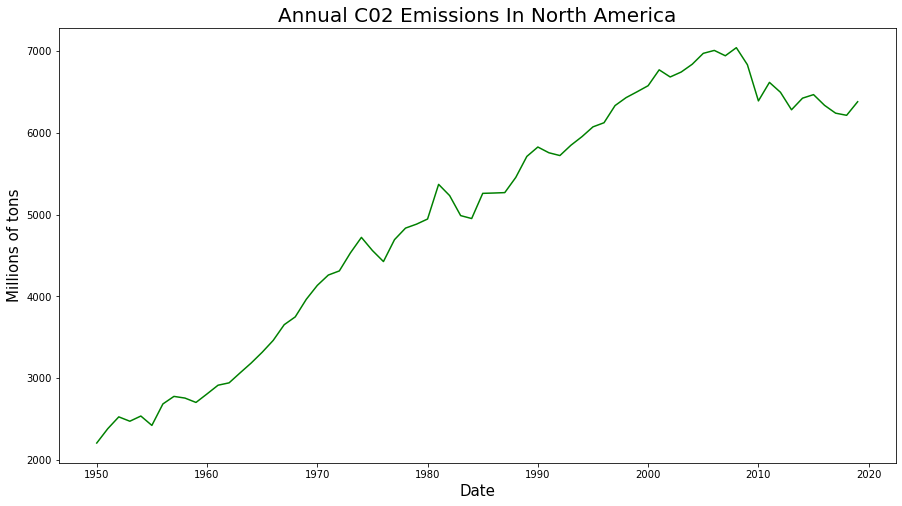

In [14]:
plt.plot(df,color='green')
plt.title('Annual C02 Emissions In North America',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Millions of tons',fontsize=15)
plt.show()

In [22]:
plt.rcParams['figure.figsize'] = [15,8]

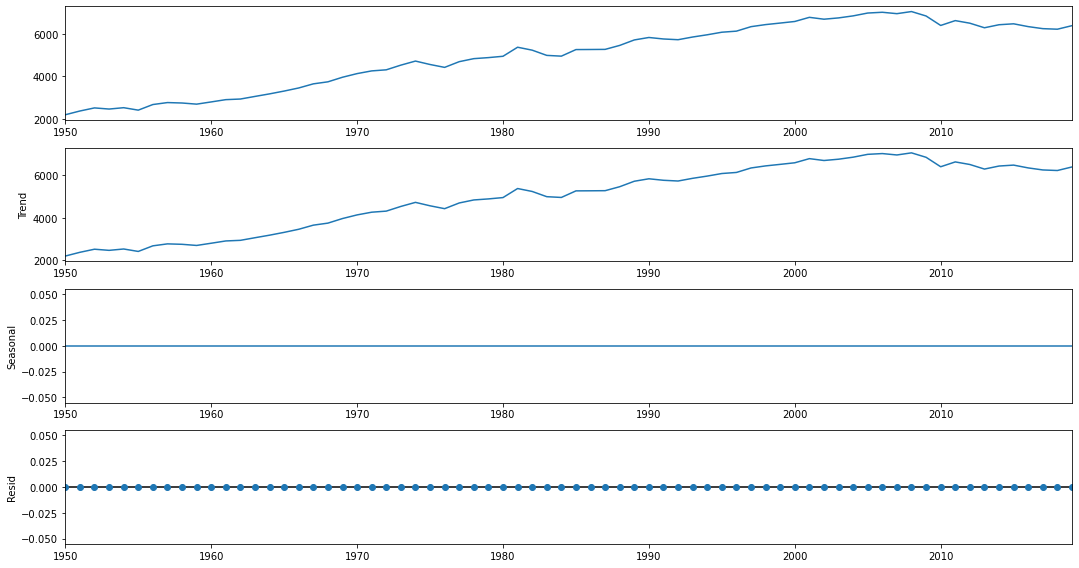

In [15]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

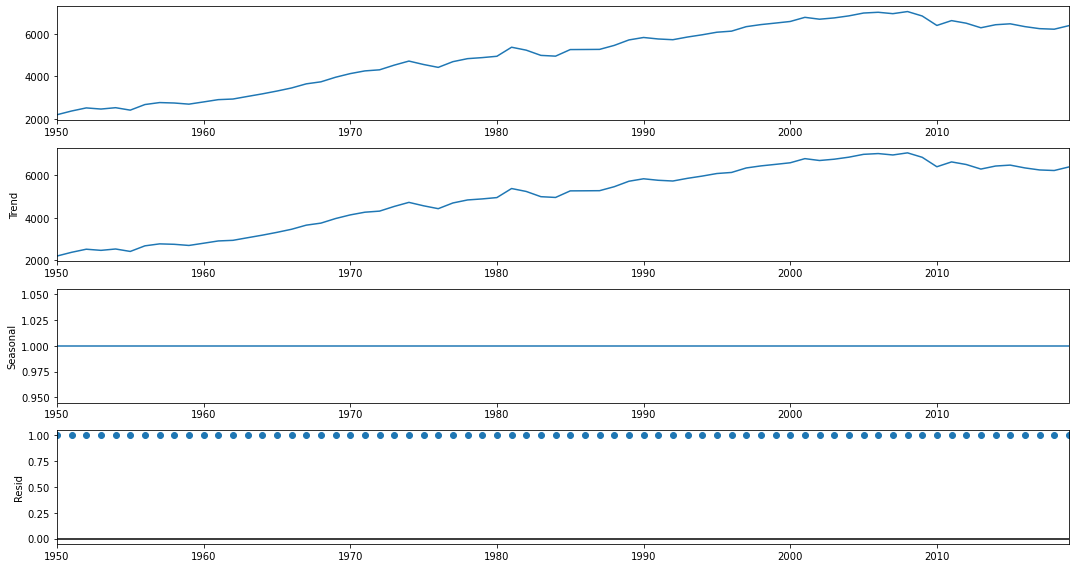

In [16]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

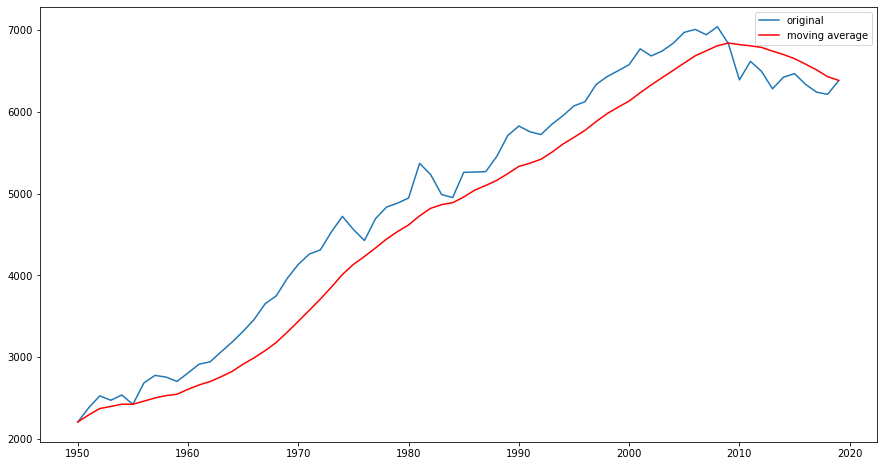

In [17]:
plt.plot(df,label='original')
plt.plot(df.rolling(10,min_periods=0).mean(),label='moving average',color='r')
plt.legend(loc='best')
plt.show()

In [26]:
# Model building - Exponential Smoothing Techniques

In [18]:
train_end = datetime(2009,1,1)
test_end = datetime(2019,1,1)

In [19]:
train = df[:train_end]
test = df[train_end + timedelta(days=1):test_end]

In [20]:
train.tail()

,million_tonnes
time_stamp,
2004-12-31,6973.069314
2005-12-31,7008.754879
2006-12-31,6943.430516
2007-12-31,7042.220682
2008-12-31,6834.085119


In [21]:
test.tail()

,million_tonnes
time_stamp,
2014-12-31,6468.127089
2015-12-31,6336.860299
2016-12-31,6241.322193
2017-12-31,6215.118995
2018-12-31,6381.236073


In [22]:
len(train)

60

In [23]:
len(test)

10

##### Simple Exponential Smoothing

In [24]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(optimized=True)
SES_model.summary()

Dep. Variable:,million_tonnes,No. Observations:,60
Model:,SimpleExpSmoothing,SSE,1326446.760
Optimized:,True,AIC,604.220
Trend:,None,BIC,608.409
Seasonal:,None,AICC,604.947
Seasonal Periods:,None,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,17:31:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,2206.6908,l.0,True


In [25]:
SES_predict = SES_model.forecast(len(test))

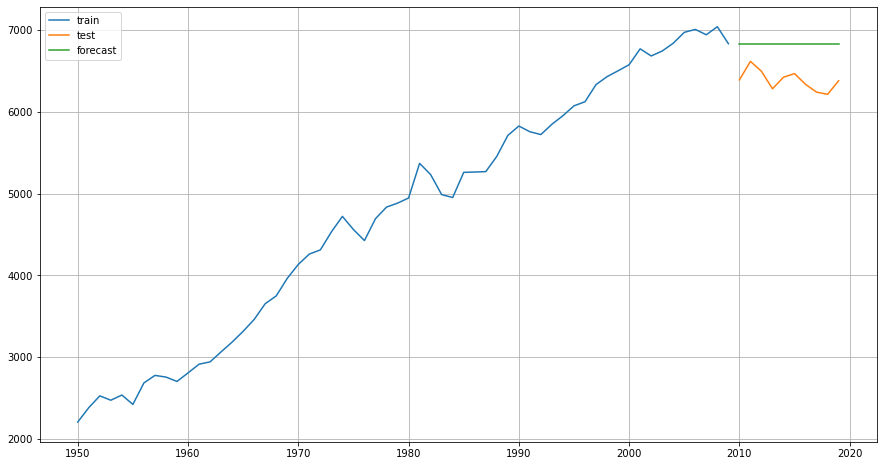

In [26]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [27]:
print("MAE:",MAE(test['million_tonnes'],SES_predict))
print("MAPE:",MAPE(test['million_tonnes'],SES_predict))

MAE: 448.45951287676115
MAPE: 7.058855305151318


##### Double Exponential Smoothing

In [28]:
DES = Holt(train,exponential=True,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=0.9990000,
                   smoothing_trend=0.4890000714)
DES_model.summary()

Dep. Variable:,million_tonnes,No. Observations:,60
Model:,Holt,SSE,1374634.885
Optimized:,True,AIC,610.361
Trend:,Multiplicative,BIC,618.739
Seasonal:,None,AICC,611.946
Seasonal Periods:,None,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,17:33:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9990000,alpha,False
smoothing_trend,0.4890001,beta,False


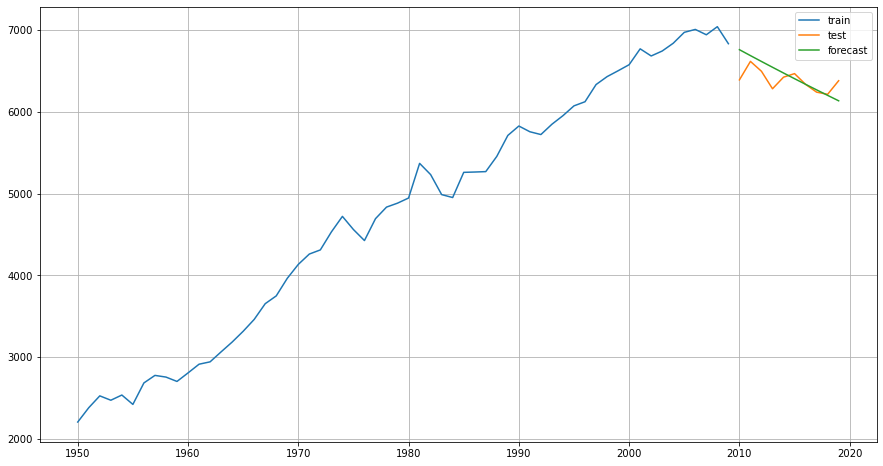

In [29]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [30]:
print("MAE:",MAE(test['million_tonnes'],DES_predict))
print("MAPE:",MAPE(test['million_tonnes'],DES_predict))

MAE: 122.33532721466308
MAPE: 1.915035082400433


##### Triple Exponential Smoothing

In [31]:
TES = ExponentialSmoothing(train,trend='additive',seasonal=None,initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.9990000,
                   smoothing_trend=0.4890000714)
TES_model.summary()

Dep. Variable:,million_tonnes,No. Observations:,60
Model:,ExponentialSmoothing,SSE,1328926.661
Optimized:,True,AIC,608.332
Trend:,Additive,BIC,616.710
Seasonal:,None,AICC,609.917
Seasonal Periods:,None,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,17:33:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9990000,alpha,False
smoothing_trend,0.4890001,beta,False


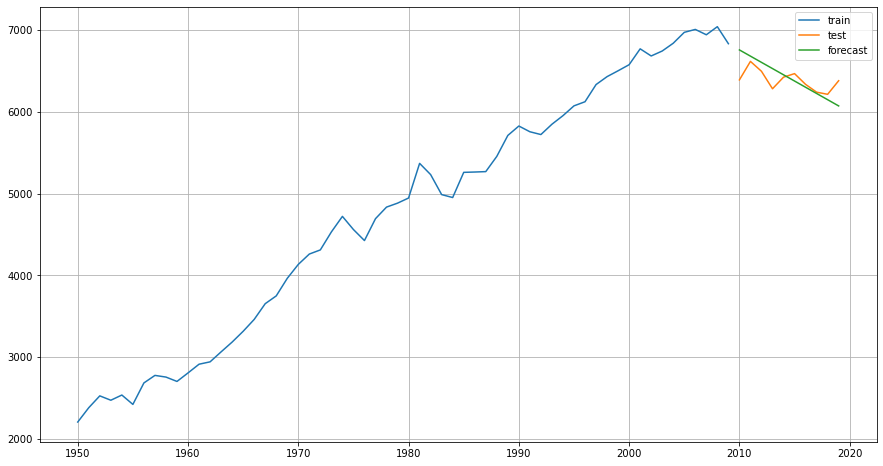

In [32]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [33]:
print("MAE:",MAE(test['million_tonnes'],TES_predict))
print("MAPE:",MAPE(test['million_tonnes'],TES_predict))

MAE: 133.22232141567557
MAPE: 2.0877284290995624


##### ACF and PACF plots

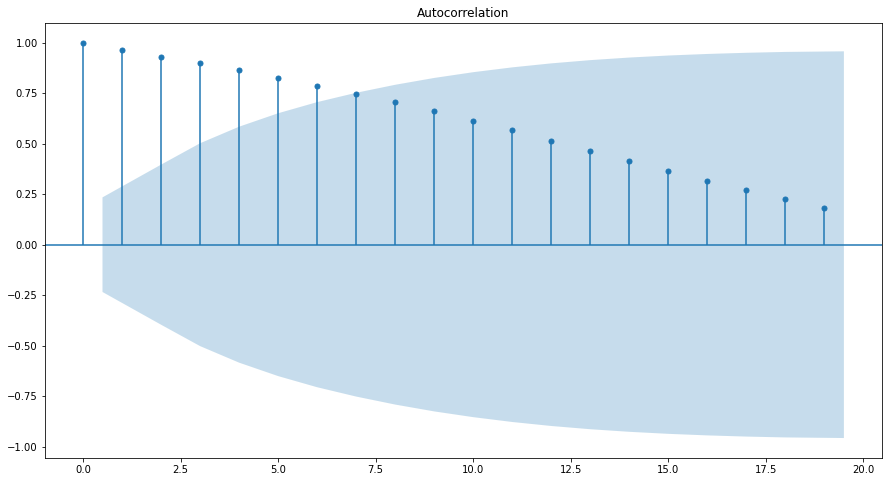

In [34]:
plot_acf(df)
plt.show()

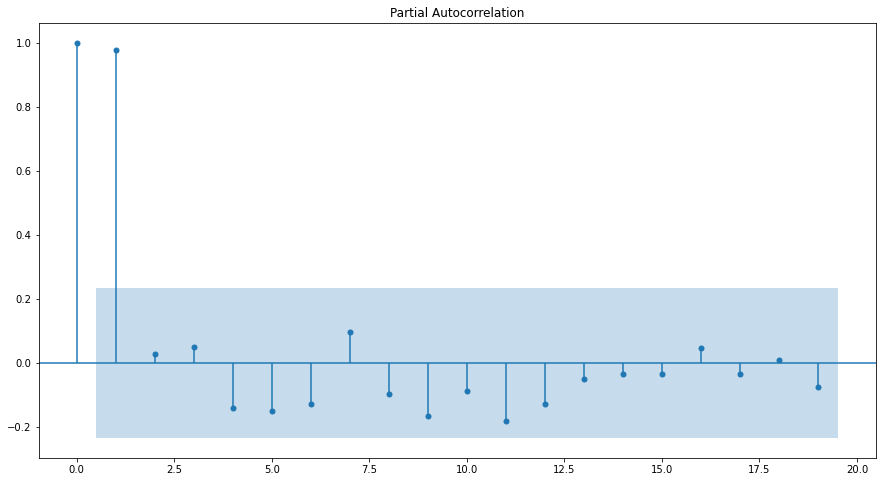

In [35]:
plot_pacf(df)
plt.show()

##### DickyFuller test

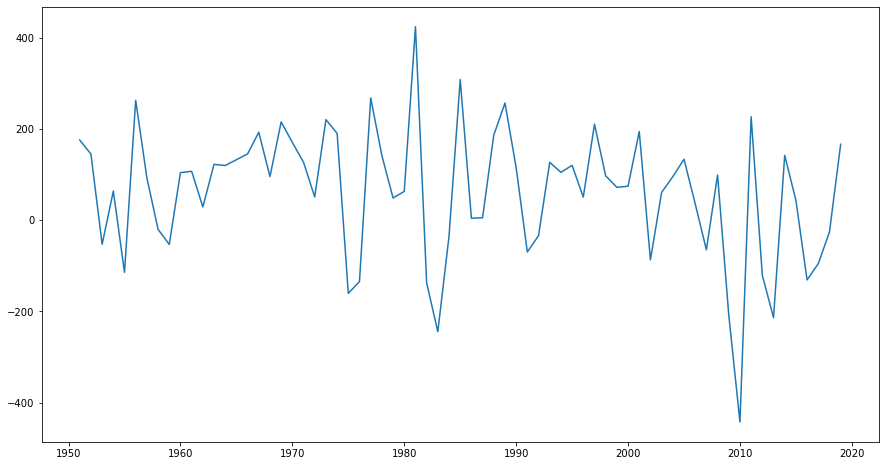

In [36]:
diff_series = df.diff(periods=1).dropna()
plt.plot(diff_series)
plt.show()

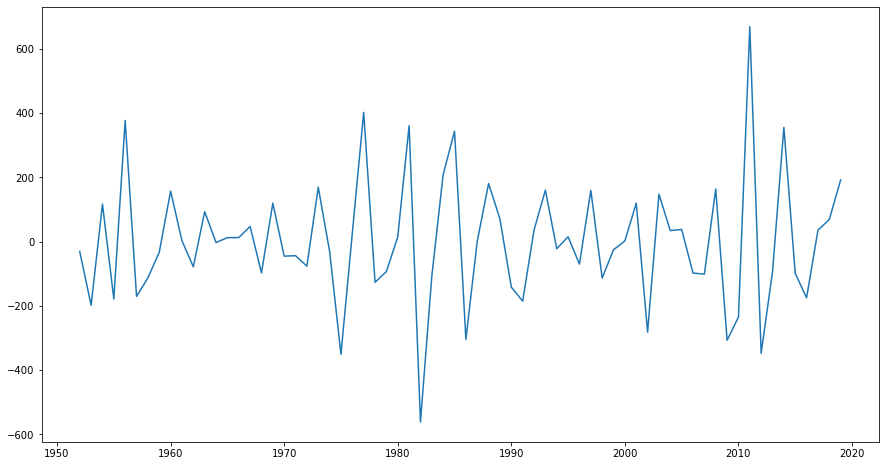

In [37]:
diff_series_2 = diff_series.diff(periods=1).dropna()
plt.plot(diff_series_2)
plt.show()

In [38]:
observations = df.values
df_results = adfuller(observations)
df_results

(-1.8954717217324777,
 0.33419434526855246,
 8,
 61,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866},
 738.8029738458217)

In [215]:
##### Non-stationary series -- proceed with ARIMA & SARIMA model

In [39]:
val = diff_series.values
res = adfuller(val)
res

(-1.2817469752195456,
 0.6374811752697497,
 7,
 61,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866},
 731.6899352941449)

In [40]:
val = diff_series_2.values
res = adfuller(val)
res

(-6.003366733834977,
 1.6372475919383048e-07,
 6,
 61,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866},
 718.6729726515531)

##### ARIMA Model

In [16]:
import itertools

In [40]:
p = q = range(0,6)
d = range(1,3)
pdq = list(itertools.product(p,d,q))
print("Parameter combinations are:")
for i in range(1,len(pdq)):
    print("ARIMA",pdq[i])

Parameter combinations are:
ARIMA (0, 1, 1)
ARIMA (0, 1, 2)
ARIMA (0, 1, 3)
ARIMA (0, 1, 4)
ARIMA (0, 1, 5)
ARIMA (0, 2, 0)
ARIMA (0, 2, 1)
ARIMA (0, 2, 2)
ARIMA (0, 2, 3)
ARIMA (0, 2, 4)
ARIMA (0, 2, 5)
ARIMA (1, 1, 0)
ARIMA (1, 1, 1)
ARIMA (1, 1, 2)
ARIMA (1, 1, 3)
ARIMA (1, 1, 4)
ARIMA (1, 1, 5)
ARIMA (1, 2, 0)
ARIMA (1, 2, 1)
ARIMA (1, 2, 2)
ARIMA (1, 2, 3)
ARIMA (1, 2, 4)
ARIMA (1, 2, 5)
ARIMA (2, 1, 0)
ARIMA (2, 1, 1)
ARIMA (2, 1, 2)
ARIMA (2, 1, 3)
ARIMA (2, 1, 4)
ARIMA (2, 1, 5)
ARIMA (2, 2, 0)
ARIMA (2, 2, 1)
ARIMA (2, 2, 2)
ARIMA (2, 2, 3)
ARIMA (2, 2, 4)
ARIMA (2, 2, 5)
ARIMA (3, 1, 0)
ARIMA (3, 1, 1)
ARIMA (3, 1, 2)
ARIMA (3, 1, 3)
ARIMA (3, 1, 4)
ARIMA (3, 1, 5)
ARIMA (3, 2, 0)
ARIMA (3, 2, 1)
ARIMA (3, 2, 2)
ARIMA (3, 2, 3)
ARIMA (3, 2, 4)
ARIMA (3, 2, 5)
ARIMA (4, 1, 0)
ARIMA (4, 1, 1)
ARIMA (4, 1, 2)
ARIMA (4, 1, 3)
ARIMA (4, 1, 4)
ARIMA (4, 1, 5)
ARIMA (4, 2, 0)
ARIMA (4, 2, 1)
ARIMA (4, 2, 2)
ARIMA (4, 2, 3)
ARIMA (4, 2, 4)
ARIMA (4, 2, 5)
ARIMA (5, 1, 0)
ARIMA (5, 1,

In [41]:
df_score_arima = pd.DataFrame(columns=['param','aic'])
df_score_arima

,param,aic


In [42]:
from warnings import filterwarnings
filterwarnings('ignore')

In [43]:
for param in pdq:
    try:
        model = ARIMA(train,order=param)
        arima_results = model.fit()
        print("ARIMA",param,"AIC:",arima_results.aic)
        df_score_arima = df_score_arima.append({'param':param,'aic':arima_results.aic},ignore_index=True)
    except:
        continue

ARIMA (0, 1, 0) AIC: 743.7824971677514
ARIMA (0, 1, 1) AIC: 745.7694355138765
ARIMA (0, 1, 2) AIC: 743.2183606748829
ARIMA (0, 1, 3) AIC: 734.524510974529
ARIMA (0, 1, 4) AIC: 734.1389631884251
ARIMA (0, 1, 5) AIC: 733.3083280045845
ARIMA (0, 2, 0) AIC: 769.0543383823764
ARIMA (0, 2, 1) AIC: 737.6072241376171
ARIMA (0, 2, 2) AIC: 739.5145360975964
ARIMA (0, 2, 3) AIC: 737.5845572240953
ARIMA (0, 2, 4) AIC: 731.5099089337018
ARIMA (0, 2, 5) AIC: 728.2854284860107
ARIMA (1, 1, 0) AIC: 745.7785393516187
ARIMA (1, 1, 1) AIC: 747.1097220935934
ARIMA (1, 1, 2) AIC: 744.9240597525995
ARIMA (1, 1, 3) AIC: 735.9983052685476
ARIMA (1, 1, 4) AIC: 735.4590847005716
ARIMA (1, 2, 0) AIC: 765.3506212509906
ARIMA (1, 2, 1) AIC: 739.576499172018
ARIMA (1, 2, 2) AIC: 740.8155113860005
ARIMA (1, 2, 3) AIC: 739.3562498720376
ARIMA (1, 2, 4) AIC: 733.4608335139026
ARIMA (2, 1, 0) AIC: 740.7728134557183
ARIMA (2, 1, 1) AIC: 742.6931840376318
ARIMA (2, 1, 2) AIC: 733.7812799537014
ARIMA (2, 1, 5) AIC: 729.28

In [44]:
df_score_arima.sort_values('aic')

,param,aic
37,"(3, 2, 3)",720.439515
47,"(4, 2, 3)",722.219901
38,"(3, 2, 4)",722.282211
29,"(2, 2, 5)",723.685937
39,"(3, 2, 5)",723.854832
48,"(4, 2, 4)",723.867329
57,"(5, 2, 3)",724.012609
58,"(5, 2, 4)",725.538752
32,"(3, 1, 2)",726.664947
11,"(0, 2, 5)",728.285428


In [41]:
arima_model = ARIMA(train,(1,2,4))
arima_results = arima_model.fit()
print(arima_results.summary())

                             ARIMA Model Results                              
Dep. Variable:      D2.million_tonnes   No. Observations:                   58
Model:                 ARIMA(1, 2, 4)   Log Likelihood                -359.730
Method:                       css-mle   S.D. of innovations            108.260
Date:                Sat, 02 Apr 2022   AIC                            733.461
Time:                        17:34:49   BIC                            747.884
Sample:                    12-31-1951   HQIC                           739.079
                         - 12-31-2008                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -5.7666      7.913     -0.729      0.466     -21.276       9.743
ar.L1.D2.million_tonnes    -0.0323      0.146     -0.222      0.825      -0.318       0.254


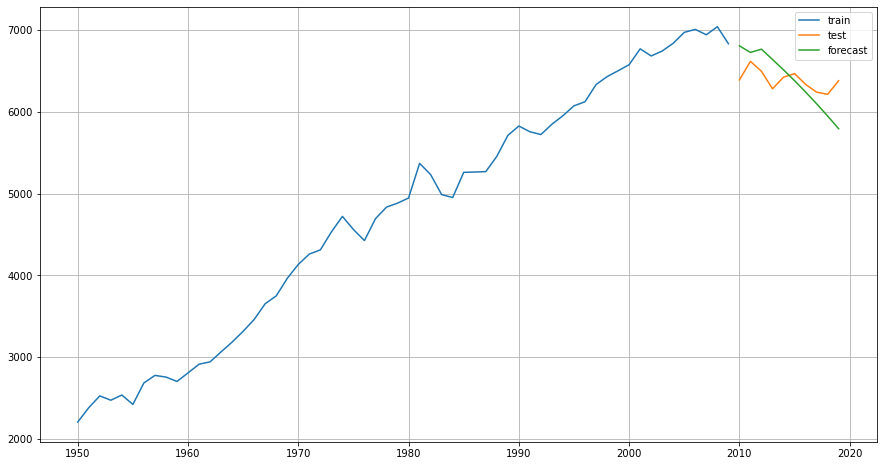

In [42]:
forecasted_values_arima = pd.Series(arima_results.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arima,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [43]:
print("MAE:",MAE(test['million_tonnes'],forecasted_values_arima))
print("MAPE:",MAPE(test['million_tonnes'],forecasted_values_arima))

MAE: 241.87886003228022
MAPE: 3.7989198776860564


##### SARIMA Model

In [44]:
model = SARIMAX(train,
                       order = (1,2,1),
                       seasonal_order = (1,2,1,3),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()

In [45]:
print(sarimax_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                    million_tonnes   No. Observations:                   60
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 3)   Log Likelihood                -315.810
Date:                           Sat, 02 Apr 2022   AIC                            641.619
Time:                                   17:35:31   BIC                            650.870
Sample:                               12-31-1949   HQIC                           645.100
                                    - 12-31-2008                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0595      0.171      0.348      0.727      -0.275       0.394
ma.L1         -1.0001    270.882     -0.004

In [46]:
forecast = sarimax_results.forecast(len(test))

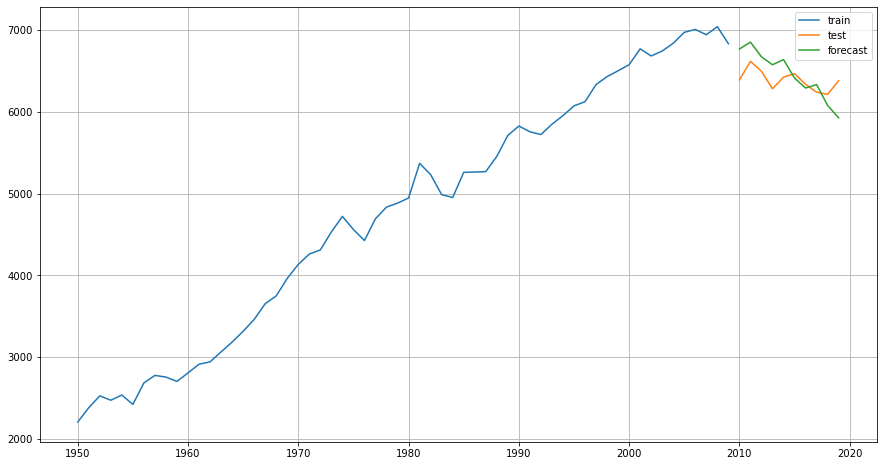

In [47]:
# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [48]:
print("MAE:",MAE(test['million_tonnes'],forecast))
print("MAPE:",MAPE(test['million_tonnes'],forecast))

MAE: 208.10349556083375
MAPE: 3.255349782216918
